# Overlay Analysis 

Overlay analyses are GIS operations in which two or more vector layers are combined to produce new geometries. Typical overlay operations include union, intersection, and difference - named after the result of the combination of two layers.

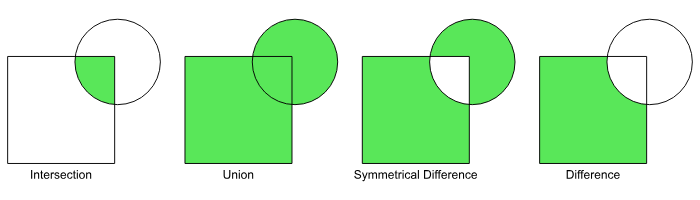
_Spatial overlay with two input vector layers (rectangle, circle). The resulting vector layer is displayed in green._
_Source: [QGIS Documentation](https://docs.qgis.org/latest/en/docs/gentle_gis_introduction/vector_spatial_analysis_buffers.html#figure-overlay-operations)

In this tutorial, we will carry out an overlay analysis to select regional data from the latest agro-ecological zones of Zimbabwe that fall within Masvingo province. 

_Remember our output from [spatial data visualisation/ vector data i/o](/spatial_data_visualisation/vector_data_input_output.ipynb) tutorial on the districts within Masvingo? We will be using that data set for this exercice together with the [New/Latest Agro-Ecological Zone of Zimbabwe](https://zimgeoportal.org.zw/layers/geonode_data:geonode:aez_Zimbabwe) from the [Zimbabwe Geoportal](https://zimgeoportal.org.zw)_

In [1]:
import pathlib
NOTEBOOK_PATH = pathlib.Path().resolve()

# define the absolute path to the data
input_data_directory = NOTEBOOK_PATH.parent / "input_data"
output_data_directory = NOTEBOOK_PATH.parent / "output_data"

This time we are getting the data directly from the [Zimbabwe Geoportal](https://zimgeoportal.org.zw) without downloading it manually. 

In [9]:
import geopandas as gpd 

# read the latest agro-ecological zones data from the ZimGeoPortal
agro_zones = gpd.read_file("http://zimgeoportal.org.zw/geoserver/ows?service=WFS&version=1.0.0&request=GetFeature&typename=geonode%3Aaez_Zimbabwe&outputFormat=SHAPE-ZIP&srs=EPSG%3A3857&format_options=charset%3AUTF-8&access_token=z8tkBFEndwcBTEvpDS7zhFqKj9zXUL")

# lets change the CRS of these agro-ecological zones to EPSG:4326
agro_zones = agro_zones.to_crs(epsg=4326)

# read the administrative data for provinces in zimbabwe
zwe_prov = gpd.read_file(input_data_directory / "zwe_adm1.gpkg")

# filter off everything to remain with Masvingo province alone (step requires knowledge of columns in GPD data frame)
masvingo_province = zwe_prov[zwe_prov.admin1Name_en == "Masvingo"]

# lets see the province data
masvingo_province.head()

,OBJECTID,admin1Name_en,admin1Pcode,Shape_Length,Shape_Area,cases,recovered,deaths,in_care,geometry
6,7,Masvingo,ZW18,12.290153,4.897978,None,None,None,None,"MULTIPOLYGON (((30.93762 -19.14856, 30.95540 -..."


Now lets plot the province data set and the Agro-ecological zones to see what it currently looks like 

<Axes: >

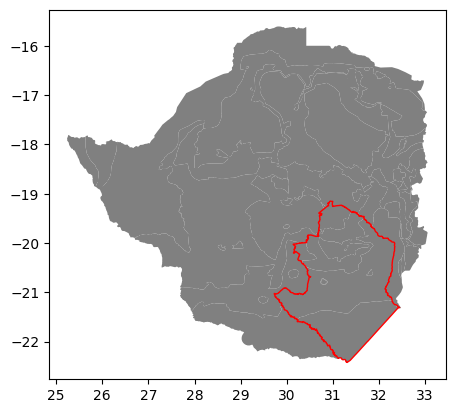

In [10]:
# plot the layers 
ax = agro_zones.plot(facecolor='gray')
masvingo_province.plot(ax=ax, facecolor='none', edgecolor='red')

Here the grey area are the _Agro-Ecological Zones of Zimbabwe_ that covers the entire country, and the red area represents the _Masvingo_ province. Our goal is to conduct an overlay analysis and select the geometries from the _Agro-Ecological Zones_ polygon layer that intersect with the _Masvingo Province_ polygom. 

When conducting overlay analysis, it is important to first check that the CRM of the layers match (just like we did with the `to_crs()` for the Zone data). The overlay visualisation indicates that everything should be okay (the layers are ploteed nicely on top of each other). 

Lets just check to make sure the CRS for the layers match. 

In [12]:
# compare the true 
agro_zones.crs == masvingo_province.crs

True

Indeed, they do. We are now ready to conduct an overlay analysis between these layers.

We will create a new layer based on _Agro-Ecological Zone_ polygons that `intersect` with our _Masvingo Province_ layer. We can use a method `overlay()` of a `GeoDataFrame` to conduct the overlay analysis that takes as an input 

1. second GeoDataFrame, and 

2. parameter how that can be used to control how the overlay analysis is conducted 

_(possible values are '`intersection`', '`union`', '`symmetric_difference`', '`difference`', and '`identity`'):_

In [13]:
intersection = agro_zones.overlay(masvingo_province, how='intersection')

Lets plot our data and see what we have: 

<Axes: >

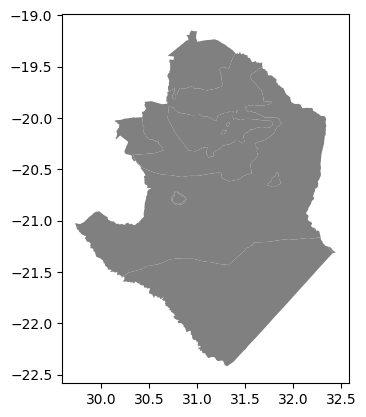

In [15]:
intersection.plot(color='gray')

As a result we now have **ONLY** those _Agro-Ecological_ zones that intersect the _Masvingo Province_ layer. If you look closely, you can also observe that **the agro-zones are still depicted as small white lines within the province on the map above**. 

- what about the attribute data? Let's see how it looks like and what we have. 

In [16]:
intersection.head()

,fid,gez_name,ID2,ID3,Shape__Are,Shape__Len,GlobalID,OBJECTID,admin1Name_en,admin1Pcode,Shape_Length,Shape_Area,cases,recovered,deaths,in_care,geometry
0,7,Region Vb,7,5,3.948201e+10,1.300077e+06,{adaed246-4cbc-4996-8bca-894fbbf86786},7,Masvingo,ZW18,12.290153,4.897978,None,None,None,None,"MULTIPOLYGON (((32.30441 -21.20061, 32.30577 -..."
1,3,Region IIb,3,2,4.052966e+10,3.550071e+06,{b491ef3c-3bb2-4cae-83eb-ce381600aceb},7,Masvingo,ZW18,12.290153,4.897978,None,None,None,None,"MULTIPOLYGON (((31.31269 -20.08874, 31.31206 -..."
2,4,Region III,4,3,7.098879e+10,6.988096e+06,{ef7b77da-2e46-4f06-a921-227f2fa39336},7,Masvingo,ZW18,12.290153,4.897978,None,None,None,None,"MULTIPOLYGON (((30.92468 -19.96907, 30.93705 -..."
3,5,Region IV,5,4,1.276044e+11,7.623292e+06,{f601542c-3856-4907-aa01-d8910e9e0492},7,Masvingo,ZW18,12.290153,4.897978,None,None,None,None,"MULTIPOLYGON (((30.97335 -19.71824, 30.97468 -..."
4,6,Region Va,6,5,1.295076e+11,5.333578e+06,{6adb7193-3616-4165-acf5-355c94b75e8a},7,Masvingo,ZW18,12.290153,4.897978,None,None,None,None,"MULTIPOLYGON (((32.44223 -21.30942, 32.44022 -..."


As we can see, due to the overlay analysis, the data set contains the attributes from both input layers. 

Optionally! You can see this result as a GeoPackage, Shapefile or whatever 

```python 
intersection.to_file(
    output_data_directory / "masvingo_agrozones.gpkg"
    )
```

There are many more examples for different types of overlay analysis in [Geopandas Documentation](http://geopandas.org/set_operations.html) where you can go and learn more. 